# basic classsification problem using(the Fashion MNIST dataset) fr#om keras

In [1]:
#importing some libararies 
from tensorflow import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.utils import to_categorical


Using TensorFlow backend.


In [2]:
#load data set and split them into train and test categori
(train_images,train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

In [3]:
#becouse each image is label with a perticular label in dataset and the class name are not included in dataset soo we store them here and use it later
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
#exploring our data 
print(train_images.shape)
print(len(test_labels))
print(test_labels.shape)
print(test_images.shape)
print(train_labels.dtype)

(60000, 28, 28)
10000
(10000,)
(10000, 28, 28)
uint8


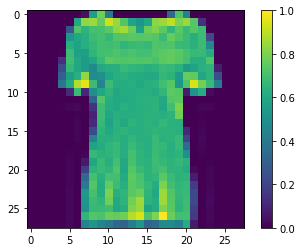

In [18]:
#plotting data
plt.figure()
plt.imshow(train_images[10]) #change index to see other stuff 
plt.colorbar()
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

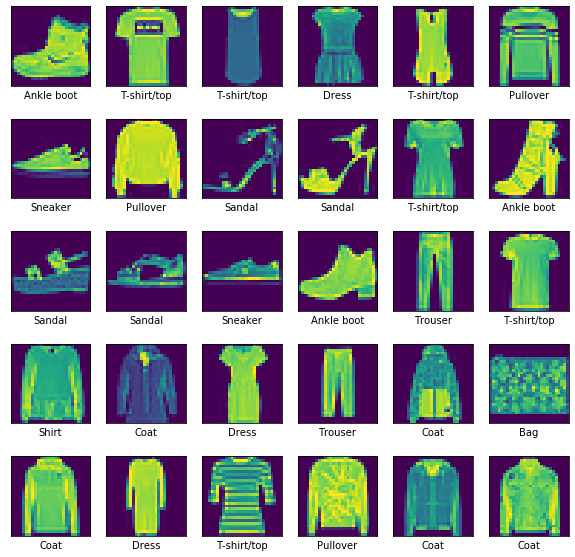

In [7]:
#display first 30 images from training set and display the class name blow each 
plt.figure(figsize=(10 , 10))
for i in range(30):
    plt.subplot(5,6 , i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show


In [8]:
#setting up layers
network = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
#compile the model
network.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])    

In [15]:
#train model using 10 epoch
network.fit(train_images, train_labels, epochs=10 , batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2550 - acc: 0.9065
Epoch 2/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2477 - acc: 0.9089
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2412 - acc: 0.9107
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2358 - acc: 0.9135
Epoch 5/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2274 - acc: 0.9161
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2213 - acc: 0.9188
Epoch 7/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2156 - acc: 0.9205
Epoch 8/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2113 - acc: 0.9217
Epoch 9/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2047 - acc: 0.9250
Epoch 10/10
60000/60000 [==============================] - 3s 46us/sample - loss: 

In [16]:
#evaluate model
test_loss , test_acc = network.evaluate(test_images,test_labels)
print('test_acc' , test_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3202 - acc: 0.8911
test_acc 0.8911
